In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
df = pd.read_csv("../data/processed/encode_data.csv")
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,130,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131
1,15,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,15,130,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
3,15,130,99,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
4,15,130,99,72,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [3]:
class_counts = df["Disease"].value_counts()


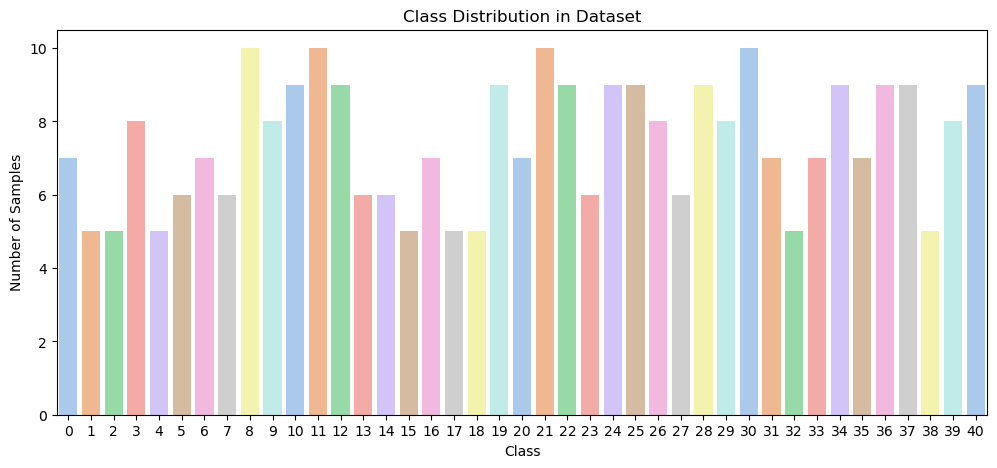

In [4]:
# Plot class imbalance
plt.figure(figsize=(12,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")

# Add labels
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Dataset")
plt.show()

In [5]:
X = df.drop(columns=["Disease"])
y = df["Disease"] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [7]:
test_df = pd.DataFrame(X_test, columns=X.columns) 
test_df["Disease"] = y_test 

In [8]:
# test_df.to_csv("../results/data/test_data.csv", index=False)


In [9]:
smote = SMOTE(k_neighbors=2, random_state=42, sampling_strategy='not minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [10]:
balanced_class_counts = pd.Series(y_train_balanced).value_counts()

Text(0.5, 1.0, 'Balanced Class Distribution (After SMOTE)')

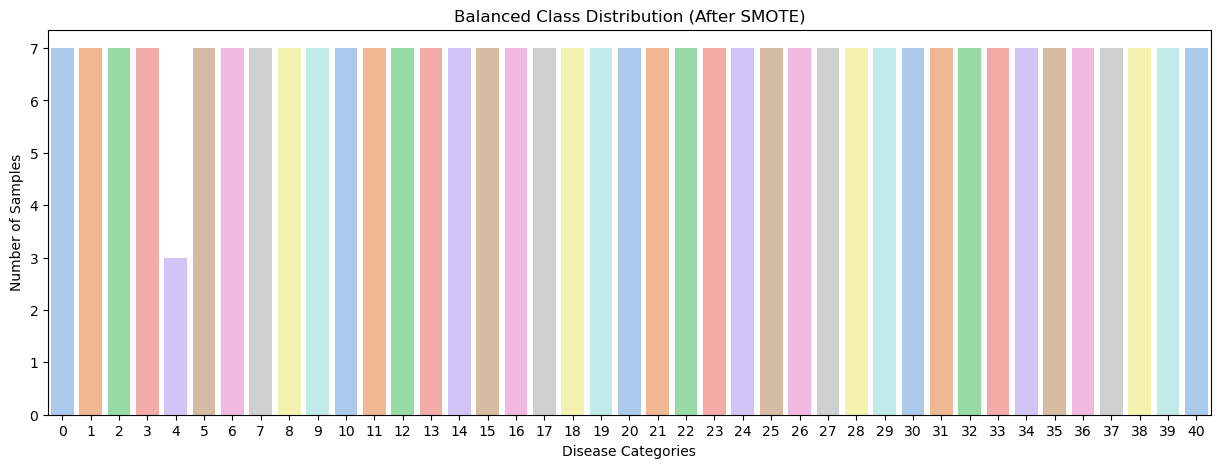

In [11]:
# Plot balanced class distribution
plt.figure(figsize=(15,5))
sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="pastel")

# Add labels
plt.xlabel("Disease Categories")
plt.ylabel("Number of Samples")
plt.title("Balanced Class Distribution (After SMOTE)")



In [12]:
X_train_balanced.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,85,8,94,131,131,131,131,131,131,131,131,131,131,131,131,131,131
1,44,123,4,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,99,85,8,94,131,131,131,131,131,131,131,131,131,131,131,131,131
3,130,99,17,103,131,131,131,131,131,131,131,131,131,131,131,131,131
4,130,99,41,58,44,59,63,109,62,89,131,131,131,131,131,131,131


In [13]:
# balanced_df = pd.DataFrame(X_train_balanced, columns=X.columns)  # Use original feature names
# balanced_df["Disease"] = y_train_balanced  # Add target column

In [14]:
# balanced_df.to_csv("../results/data/balanced_data.csv", index=False)


In [15]:
classifier = RandomForestClassifier(random_state=42)

In [16]:
classifier.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn import metrics  
print()

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       0.50      0.50      0.50         2
          15       0.50      1.00      0.67         1
          16       1.00     

d:\anaconda\envs\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:

joblib.dump(classifier, '../src/models/trained_model.pkl')

['../src/models/trained_model.pkl']